# Simple model inversion

### Getting started

First, install the required modules:

In [14]:
!pip install numpy matplotlib opencv-python tensorflow

Init

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import time
#GPU test and settings
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


TRAINDIR = 'faces/train' # directory where we store our data
TESTDIR = 'faces/test' # directory where we store our testing data
IMG_Y_SIZE = 112
IMG_X_SIZE = 92
names = os.listdir(TRAINDIR) # list of classes i.e. names
NUM_NAMES = len(names)


Num GPUs Available:  0


### Load data

In [2]:
# load the training data

training_data = []

for name in names:
    name_num = names.index(name)
    for img in os.listdir(f"{TRAINDIR}/{name}"):
        img_array = cv2.imread(f"{TRAINDIR}/{name}/{img}",cv2.IMREAD_GRAYSCALE) # convert the image to its pixel (brightness value) data
        new_array = cv2.resize(img_array,(IMG_X_SIZE,IMG_Y_SIZE)) # resize if need be
        training_data.append([new_array, name_num]) # add it to training_data along with its name


random.shuffle(training_data) # randomize the training data (make learning more effective)

# prepare the training data for ML i.e. convert to numpy
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_X_SIZE,IMG_Y_SIZE,1)
y = np.array(y)

X = X / 255

train_ds = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(10000).batch(10)

print(X.shape, y.shape, train_ds.cardinality().numpy())
    

(360, 92, 112, 1) (360,) 36


In [3]:
# load the testing data

testing_data = []

for name in names:
    name_num = names.index(name)
    for img in os.listdir(f"{TESTDIR}/{name}"):
        img_array = cv2.imread(f"{TESTDIR}/{name}/{img}",cv2.IMREAD_GRAYSCALE) # convert the image to its pixel (brightness value) data
        new_array = cv2.resize(img_array,(IMG_X_SIZE,IMG_Y_SIZE)) # resize if need be
        testing_data.append([new_array, name_num]) # add it to testing_data along with its name

XT = []
yt = []

for features, label in testing_data:
    XT.append(features)
    yt.append(label)
    

XT = np.array(XT).reshape(-1,IMG_X_SIZE,IMG_Y_SIZE,1)
yt = np.array(yt)

XT = XT / 255

test_ds = tf.data.Dataset.from_tensor_slices((XT, yt)).batch(10)

print(XT.shape, yt.shape, test_ds.cardinality().numpy())


(40, 92, 112, 1) (40,) 4


### Train model

In [4]:
NAME = "Face-Recognition-CNN-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

model= Sequential([
    Input((IMG_X_SIZE,IMG_Y_SIZE, 1)),
    Conv2D(filters=36, kernel_size=7, activation='relu'),
    Flatten(),
    Dense(NUM_NAMES, activation='softmax')  
])

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 86, 106, 36)    │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 328176)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │    13,127,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,128,880 (50.08 MB)

 Trainable params: 13,128,880 (50.08 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# train the model
model.fit(X, y, batch_size=40,epochs=20, callbacks = [tensorboard])

# to view tensorboard, go to terminal and type tensorboard --logdir='logs/'

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0439 - loss: 13.5458
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3625 - loss: 2.9020
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9034 - loss: 0.9713
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9510 - loss: 0.2471
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9745 - loss: 0.0909
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 1.0000 - loss: 0.0291
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 0.0130
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 1.0000 - loss: 0.0083
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 1.0000 - loss: 0.0039
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 1.0000 - loss: 0.0011


### Reconstruct images

Decoding:  s1


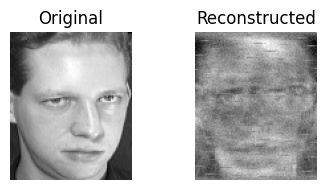

Decoding:  s10


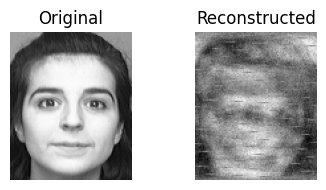

Decoding:  s11


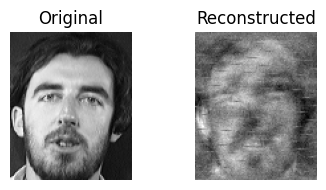

Decoding:  s12


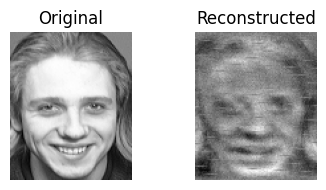

Decoding:  s13


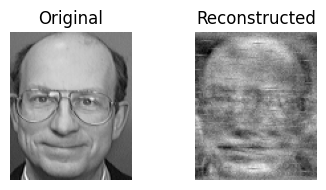

Decoding:  s14


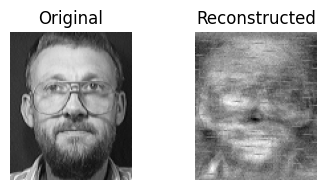

Decoding:  s15


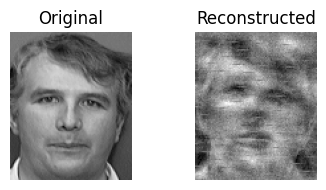

Decoding:  s16


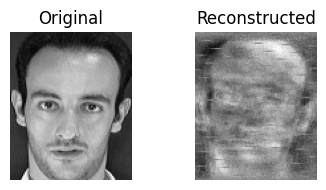

Decoding:  s17


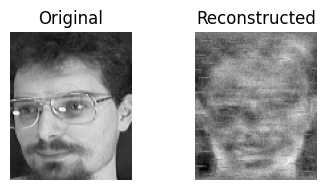

Decoding:  s18


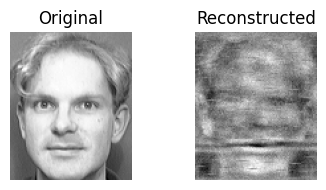

Decoding:  s19


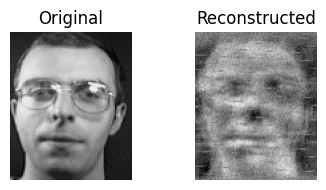

Decoding:  s2


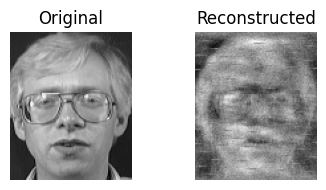

Decoding:  s20


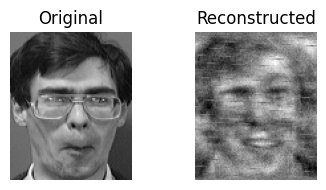

Decoding:  s21


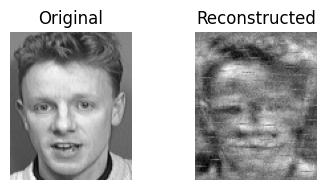

Decoding:  s22


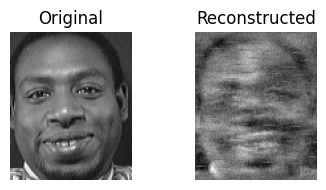

Decoding:  s23


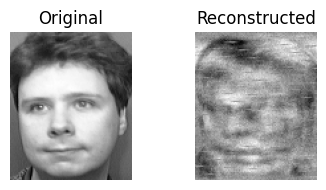

Decoding:  s24


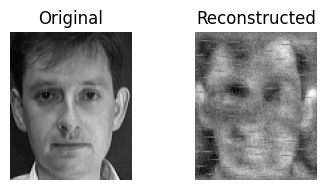

Decoding:  s25


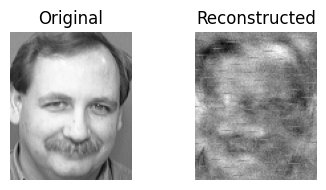

Decoding:  s26


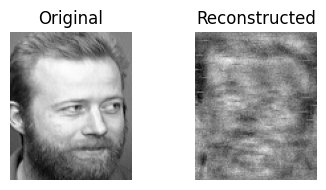

Decoding:  s27


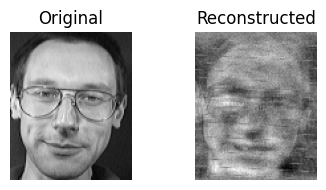

Decoding:  s28


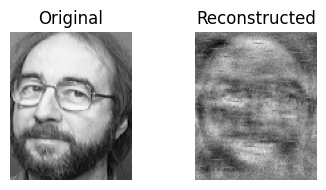

Decoding:  s29


KeyboardInterrupt: 

In [ ]:

loss_fn = SparseCategoricalCrossentropy()
learning_rate = 0.01

for name_index in range(10): # range(NUM_NAMES):
    print("Decoding: ", names[name_index])
    img = tf.convert_to_tensor(np.zeros((1,IMG_X_SIZE,IMG_Y_SIZE,1)))

    for i in range(200):
        with tf.GradientTape() as tape:
            tape.watch(img)
            prediction = model(img, training=False)
            loss = loss_fn(tf.convert_to_tensor([name_index]), prediction)
        
            gradient = tape.gradient(loss, img)
            img = tf.clip_by_value(img - learning_rate * gradient, 0, 255)

            # Add noise
            noise = np.random.normal(loc=0.01, scale=0.001, size=img.shape)
            img = np.clip(img.numpy() + noise, 0, 255)
            img = tf.convert_to_tensor(img, dtype=tf.float32)

    _, axs = plt.subplots(1, 2, figsize=(4, 2))
    axs[0].imshow(tf.reshape(XT[name_index], (IMG_Y_SIZE, IMG_X_SIZE)), cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(tf.reshape(img, (IMG_Y_SIZE, IMG_X_SIZE)), cmap='gray')
    axs[1].set_title("Reconstructed")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()